In [2]:
!pip install fastai 'duckduckgo_search>=6.2'


  Using cached fastai-2.8.1-py3-none-any.whl.metadata (9.5 kB)
  Using cached duckduckgo_search-8.0.1-py3-none-any.whl.metadata (16 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached fastcore-1.8.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached fasttransform-0.0.2-py3-none-any.whl.metadata (7.6 kB)
  Using cached torchvision-0.22.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached pillow-11.2.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.15.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metada

In [3]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [4]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('bird photos', max_images=1)
urls[0]


'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

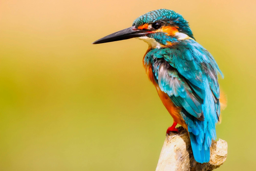

In [5]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

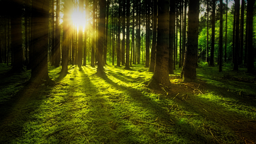

In [6]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [56]:
searches = 'fish',
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(dest, max_size=400, dest=dest)

/home/prinzz/main/my-projects/fastai/virtual-env/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/prinzz/main/my-projects/fastai/virtual-env/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/prinzz/main/my-projects/fastai/virtual-env/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/prinzz/main/my-projects/fastai/virtual-env/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/prinzz/main/my-projects/fastai/virtual-env/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed


In [57]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/home/prinzz/main/my-projects/fastai/virtual-env/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/prinzz/main/my-projects/fastai/virtual-env/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/prinzz/main/my-projects/fastai/virtual-env/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/prinzz/main/my-projects/fastai/virtual-env/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/prinzz/main/my-projects/fastai/virtual-env/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed


11

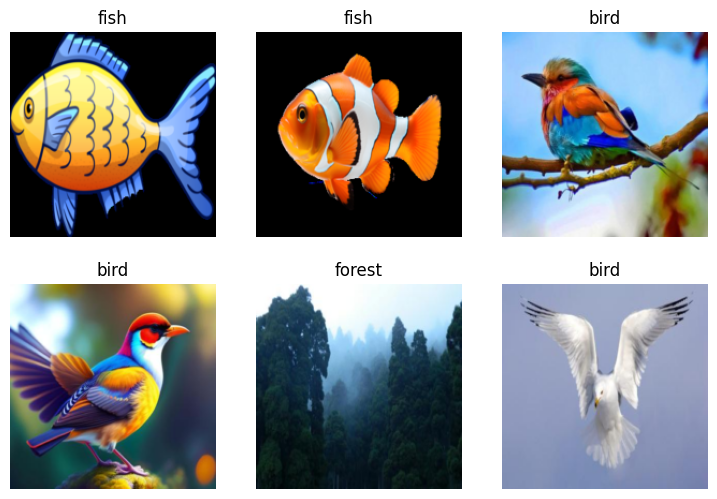

In [59]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [63]:
learn = vision_learner(dls, resnet101, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /home/prinzz/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:15<00:00, 11.5MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.824255,0.239252,0.059322,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.177417,0.200723,0.076271,00:03
1,0.132751,0.178021,0.059322,00:03
2,0.107396,0.308522,0.076271,00:03
3,0.098963,0.287495,0.076271,00:03
4,0.080829,0.248523,0.076271,00:03
5,0.067774,0.244328,0.076271,00:03
6,0.066006,0.218856,0.076271,00:03
7,0.056930,0.210906,0.067797,00:03
8,0.048885,0.206465,0.067797,00:03
9,0.039663,0.206347,0.076271,00:03


In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('./test/fish.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a fish: {probs[1]:.4f}")

This is a: fish.
Probability it's a bird: 1.0000


In [49]:
url = search_images("fish",max_images=1)[0]
download_images(dest='./test',urls=[url])
